# 인공신경망 모델의 학습

$$y = x^2+3$$

## 필요한 라이브러리 불러오기

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [12]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=0.5)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

# 모델, 손실 함수, 최적화 함수 설정

- `nn.Sequential` 클래스는 `nn.Linear`, `nn.ReLU` 등의 모듈들을 인수로 받아서 순서대로 정렬 후 입력값이 들어오면 이를 순차적으로 수행하여 결괏값을 리턴합니다

In [13]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

## 모델의 학습

In [14]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

## 손실 그래프

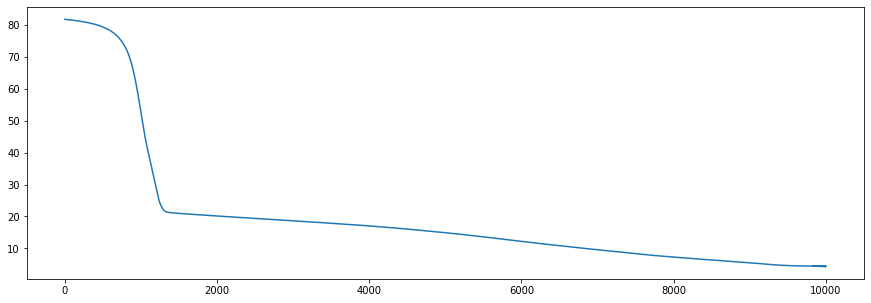

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

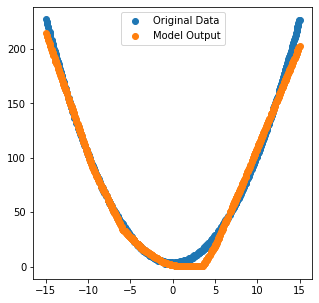

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()